# Trainee: Mo'men Zanatii

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1: Import Data

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Train dataset shape: (8523, 12)
Test dataset shape: (5681, 11)


In [7]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
train['Item_Weight'].fillna(train['Item_Weight'].mode()[0], inplace=True)
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0], inplace=True)
train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### We have two columns with many nulls [Item_Weight, Outlet_Size]

### Step 2: Univariate Analysis

**First we should extract the numerical and categorical columns.**

In [9]:
categorical_cols = train.select_dtypes(exclude=['int64','int32','float64','float32']).columns
numeric_cols = train.select_dtypes(exclude=['object']).columns 

In [10]:
categorical_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [11]:
numeric_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

### Numerical Columns

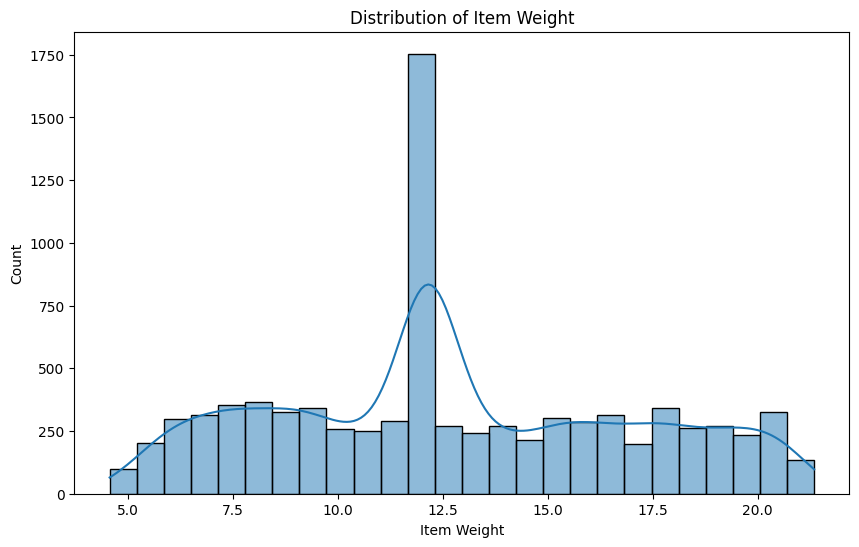

In [12]:
# Distribution of Item_Weight
plt.figure(figsize=(10,6))
sns.histplot(train['Item_Weight'].dropna(), kde=True) # because Item_Weight has many nulls 
plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Count')
plt.show()

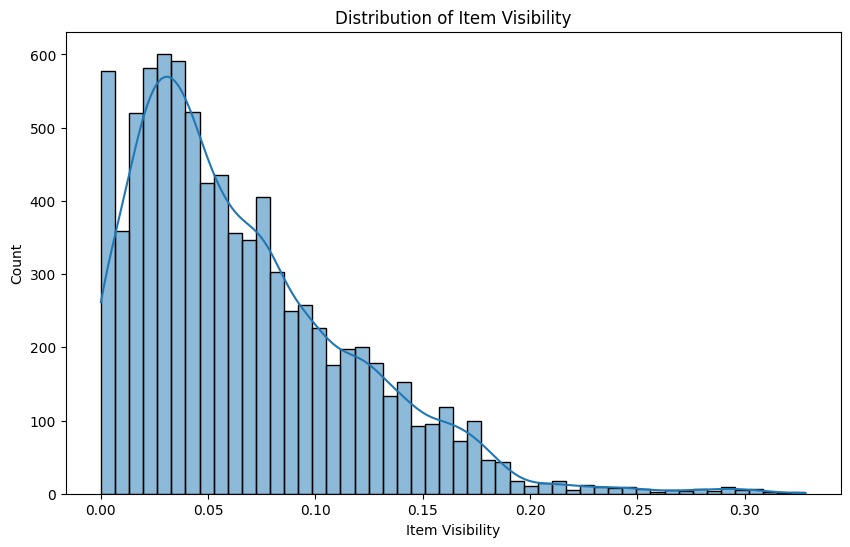

In [13]:
# Distribution of Item_Visibility
plt.figure(figsize=(10,6))
sns.histplot(train['Item_Visibility'], kde=True)
plt.title('Distribution of Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Count')
plt.show()

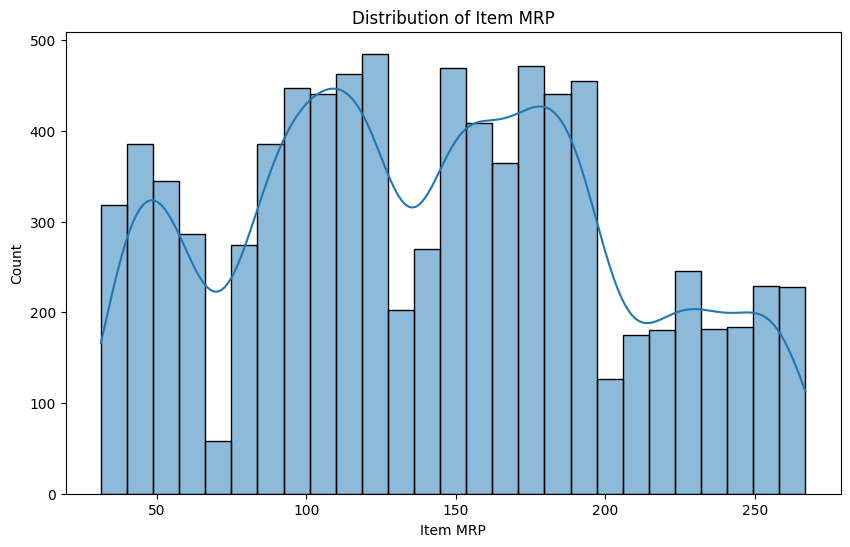

In [14]:
# Distribution of Item_MRP
plt.figure(figsize=(10,6))
sns.histplot(train['Item_MRP'], kde=True)
plt.title('Distribution of Item MRP')
plt.xlabel('Item MRP')
plt.ylabel('Count')
plt.show()

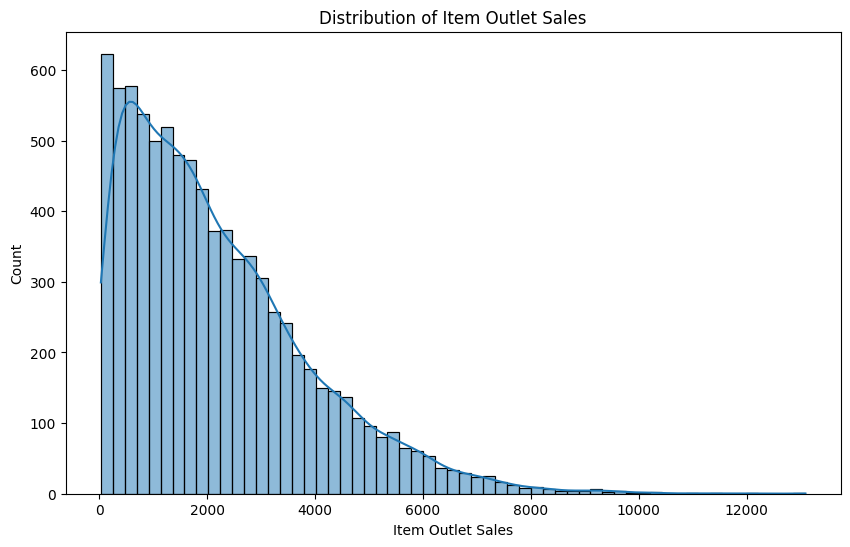

In [15]:
# Distribution of Item_Outlet_Sales
plt.figure(figsize=(10,6))
sns.histplot(train['Item_Outlet_Sales'], kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Count')
plt.show()


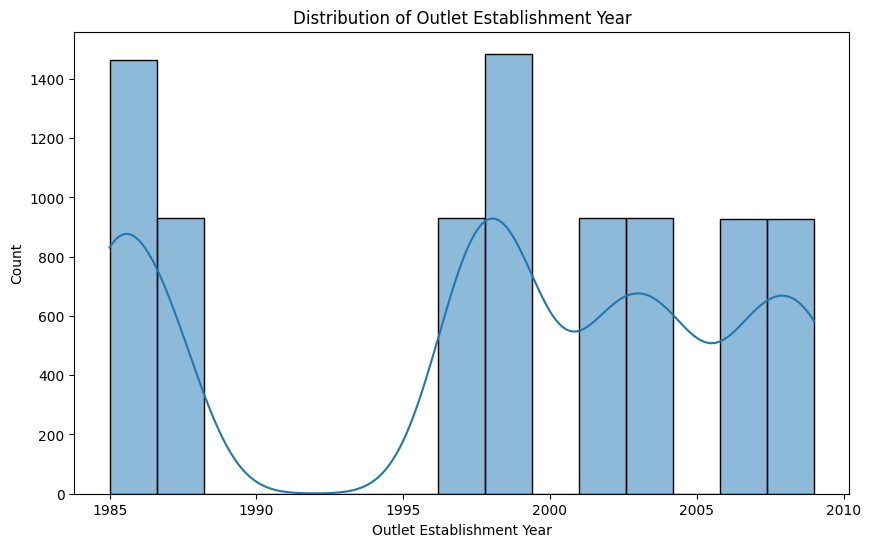

In [16]:
# Distribution of Outlet_Establishment_Year
plt.figure(figsize=(10,6))
sns.histplot(train['Outlet_Establishment_Year'], kde=True)
plt.title('Distribution of Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Count')
plt.show()


### There's a noticeable gap between 1990 to 1995 in the Outlet_Establishment_Year data.

In [17]:
categorical_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### Categorical Columns

In [18]:
categorical_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

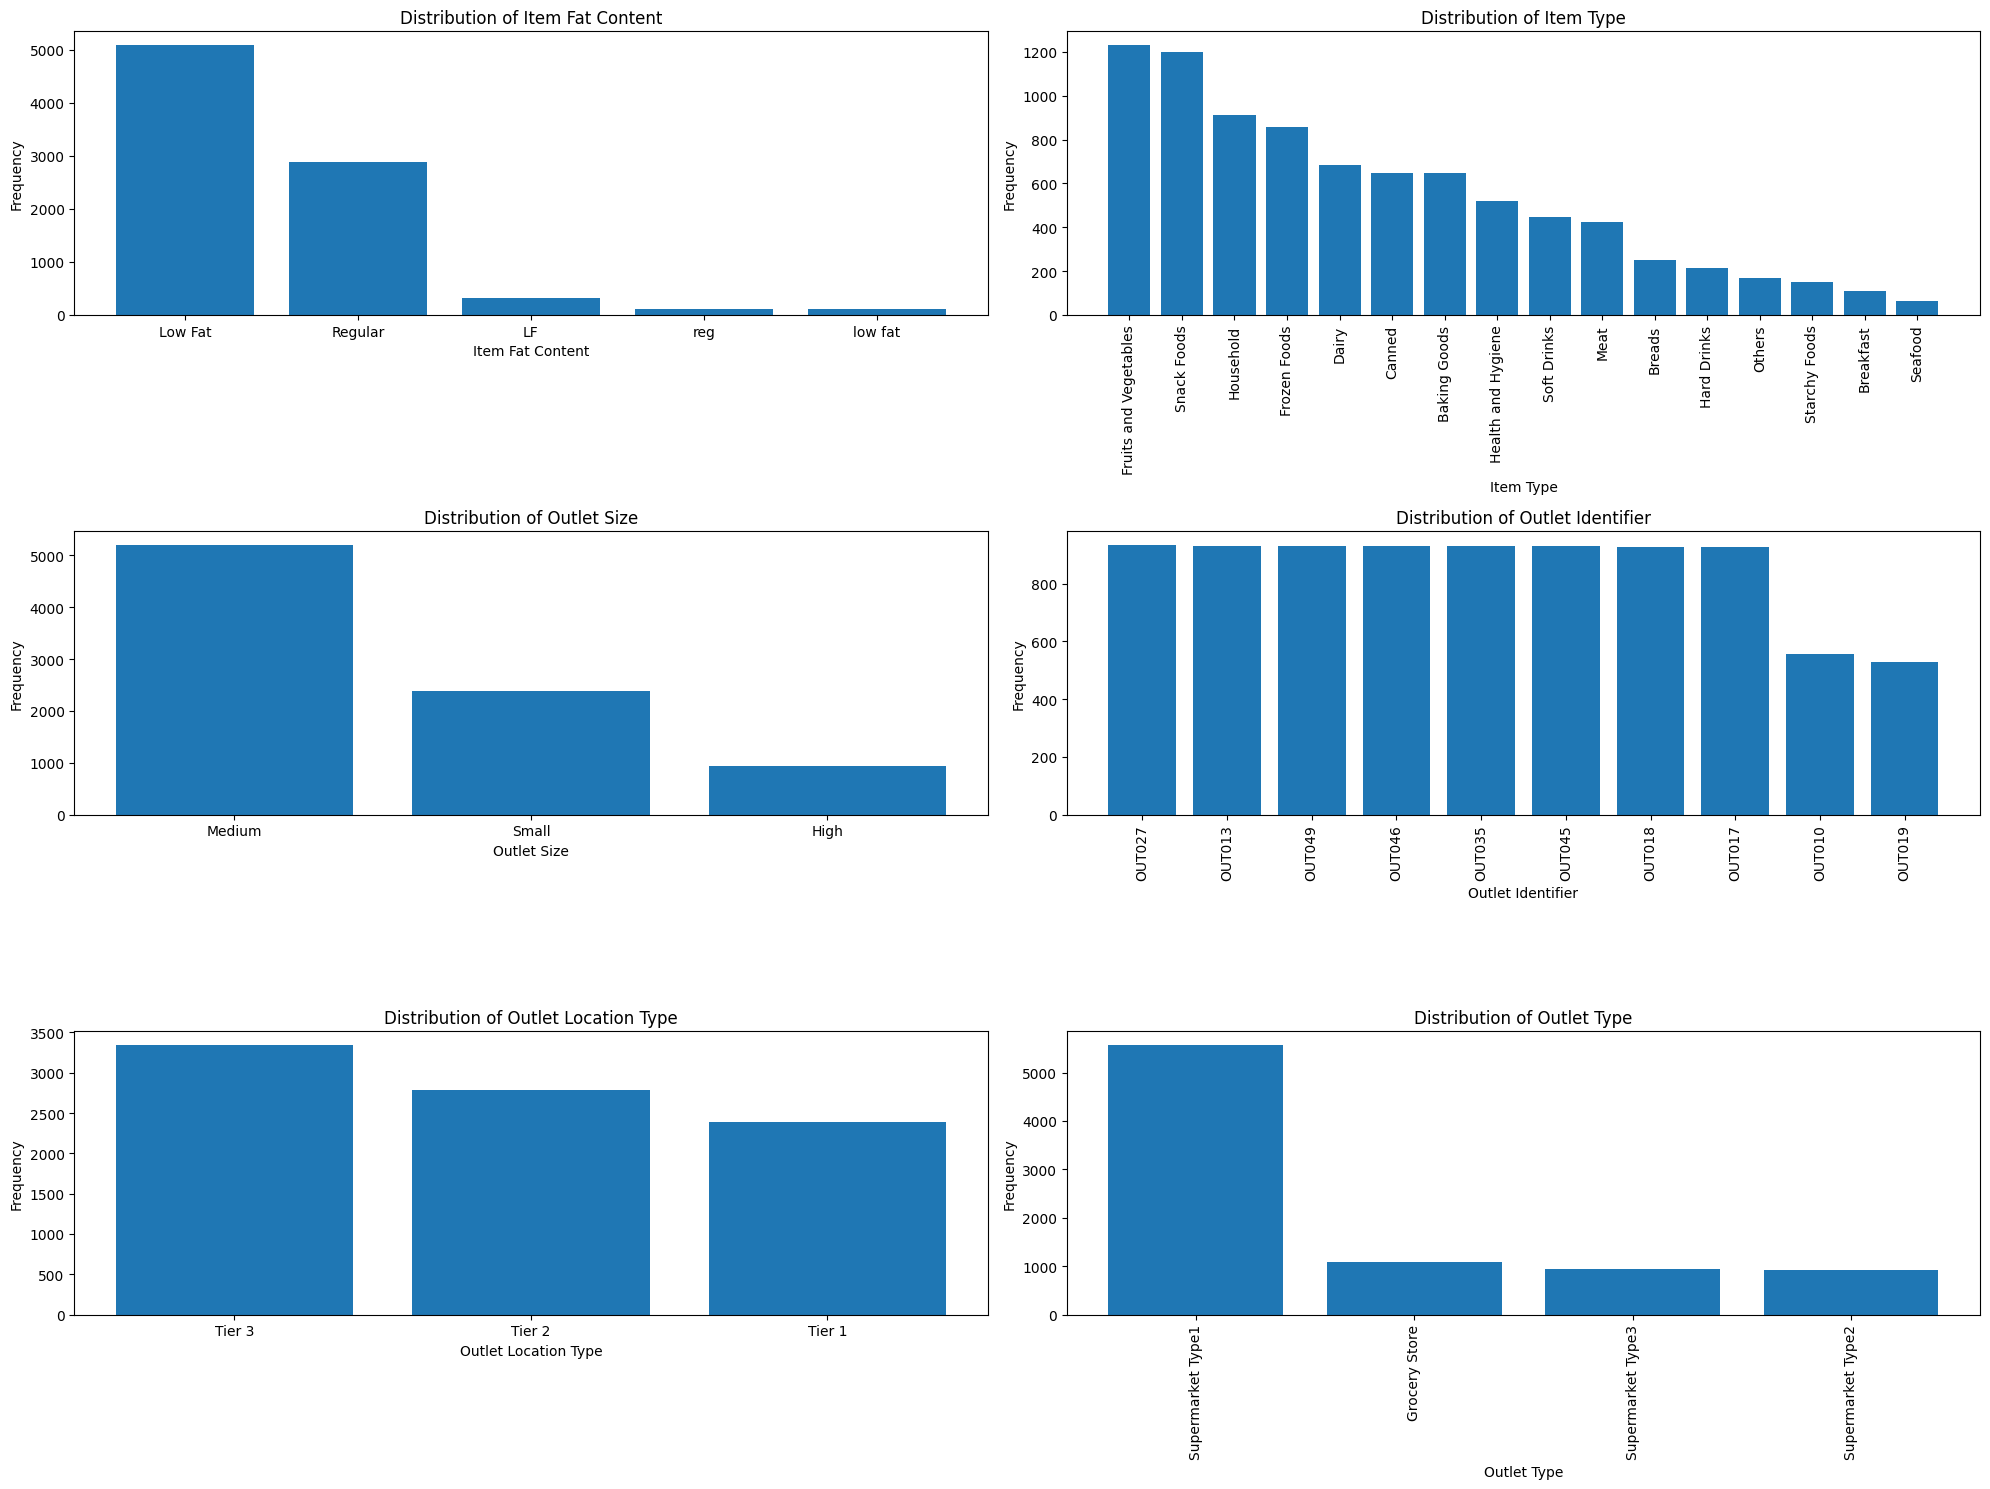

In [19]:
# Checking the distribution of the categorical variables
fig, axs = plt.subplots(3, 2, figsize=(20, 15))

axs[0, 0].bar(train['Item_Fat_Content'].value_counts().index, train['Item_Fat_Content'].value_counts().values)
axs[0, 0].set_title('Distribution of Item Fat Content')
axs[0, 0].set_xlabel('Item Fat Content')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].bar(train['Item_Type'].value_counts().index, train['Item_Type'].value_counts().values)
axs[0, 1].set_title('Distribution of Item Type')
axs[0, 1].set_xlabel('Item Type')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].tick_params(axis='x', rotation=90)

axs[1, 0].bar(train['Outlet_Size'].value_counts().index, train['Outlet_Size'].value_counts().values)
axs[1, 0].set_title('Distribution of Outlet Size')
axs[1, 0].set_xlabel('Outlet Size')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].bar(train['Outlet_Identifier'].value_counts().index, train['Outlet_Identifier'].value_counts().values)
axs[1, 1].set_title('Distribution of Outlet Identifier')
axs[1, 1].set_xlabel('Outlet Identifier')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].tick_params(axis='x', rotation=90)

axs[2, 0].bar(train['Outlet_Location_Type'].value_counts().index, train['Outlet_Location_Type'].value_counts().values)
axs[2, 0].set_title('Distribution of Outlet Location Type')
axs[2, 0].set_xlabel('Outlet Location Type')
axs[2, 0].set_ylabel('Frequency')

axs[2, 1].bar(train['Outlet_Type'].value_counts().index, train['Outlet_Type'].value_counts().values)
axs[2, 1].set_title('Distribution of Outlet Type')
axs[2, 1].set_xlabel('Outlet Type')
axs[2, 1].set_ylabel('Frequency')
axs[2, 1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [20]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [21]:
train['Item_Fat_Content'].replace('Low Fat', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('LF', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('low fat', 'Low_Fat',inplace=True)
train['Item_Fat_Content'].replace('reg', 'Regular',inplace=True)

In [22]:
test['Item_Fat_Content'].replace('Low Fat', 'Low_Fat',inplace=True)
test['Item_Fat_Content'].replace('LF', 'Low_Fat',inplace=True)
test['Item_Fat_Content'].replace('low fat', 'Low_Fat',inplace=True)
test['Item_Fat_Content'].replace('reg', 'Regular',inplace=True)

In [23]:
train['Item_Fat_Content'].value_counts()

Low_Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

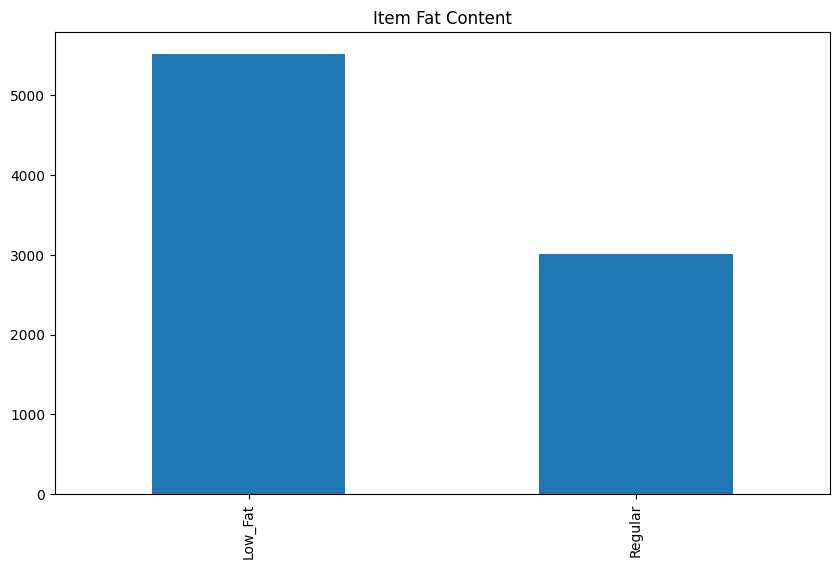

In [24]:
train['Item_Fat_Content'].value_counts().plot.bar(figsize=(10,6),title= "Item Fat Content")
plt.show()

### Step 3: Bivariate Analysis

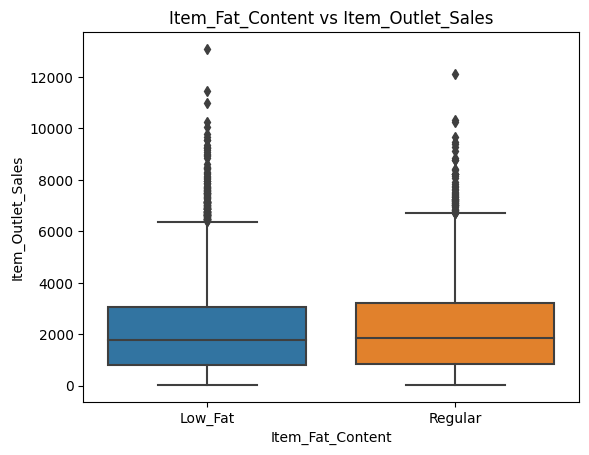

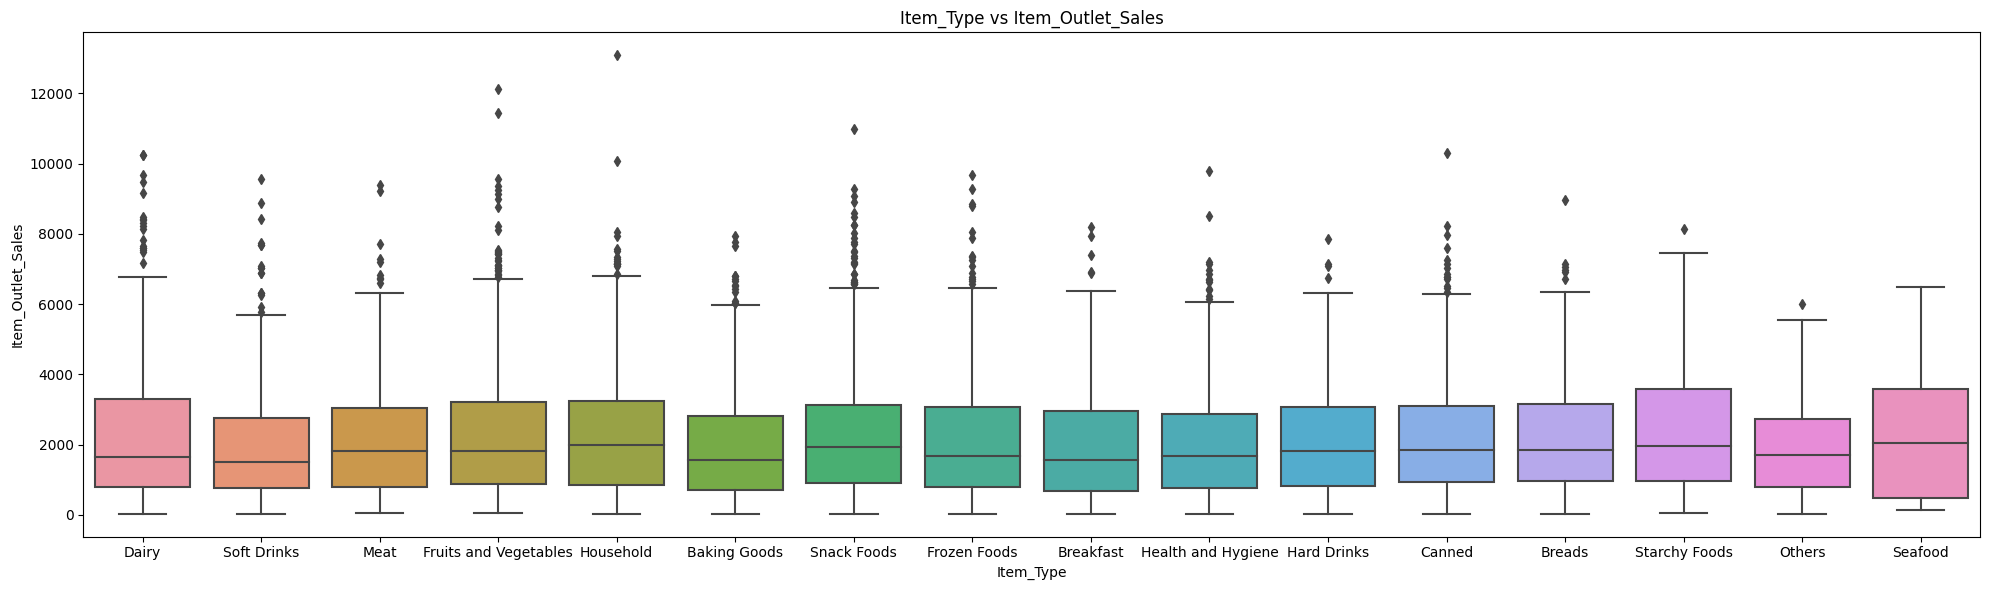

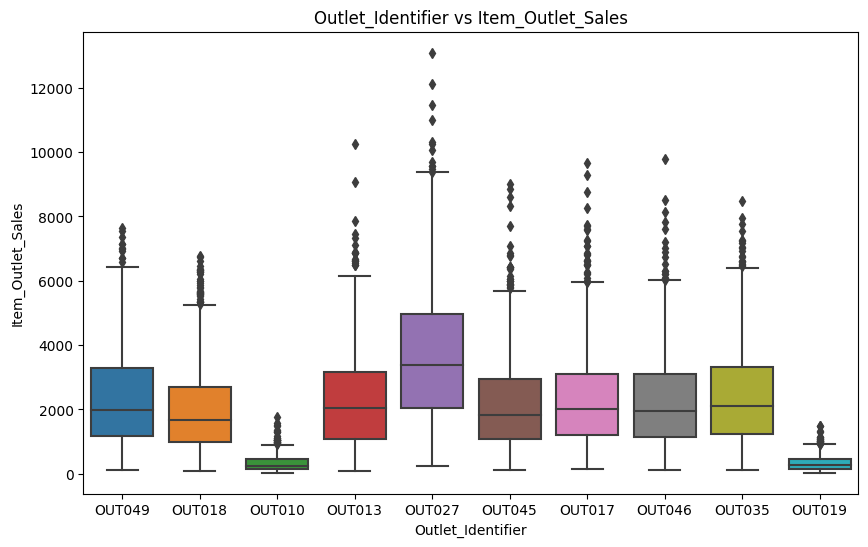

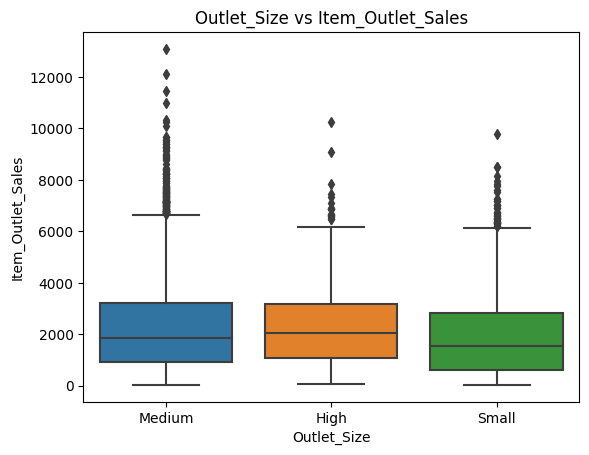

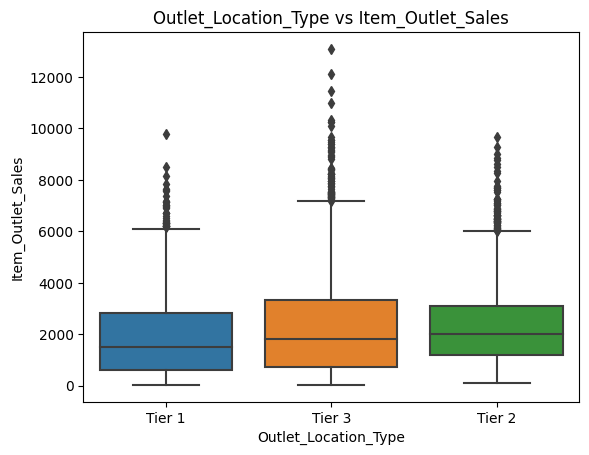

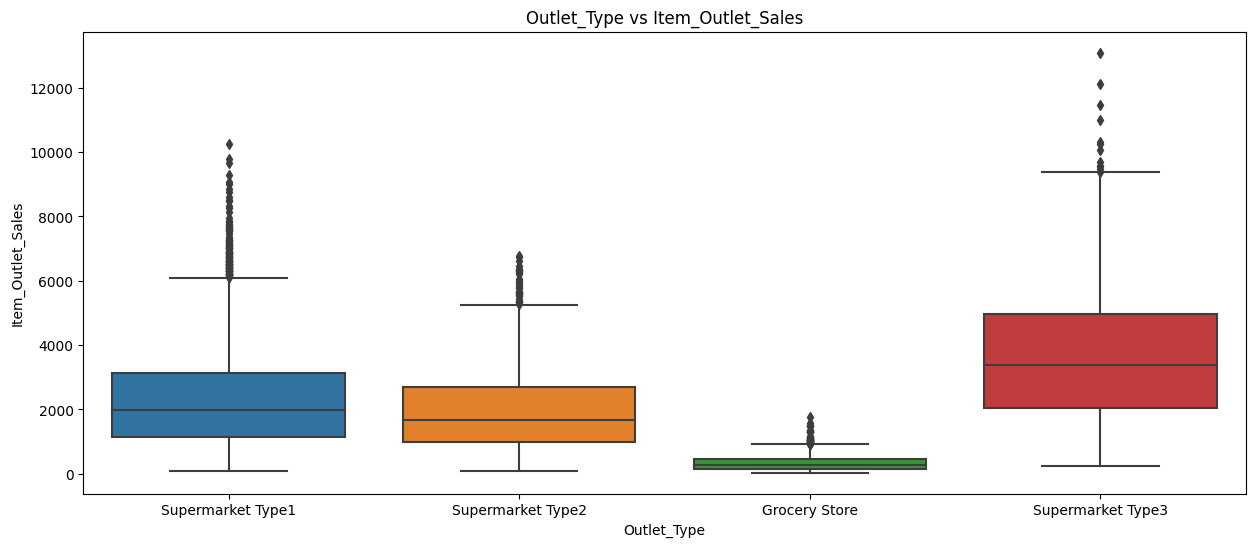

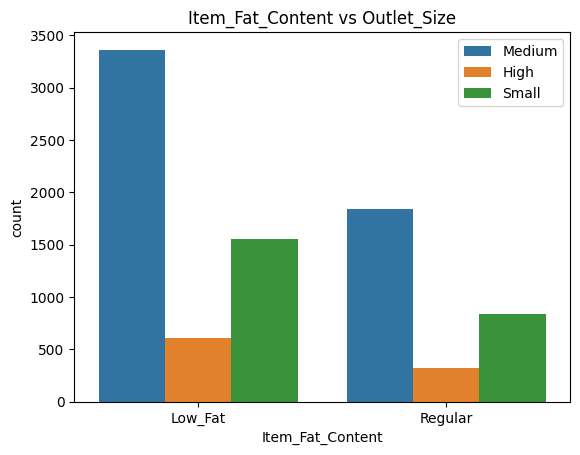

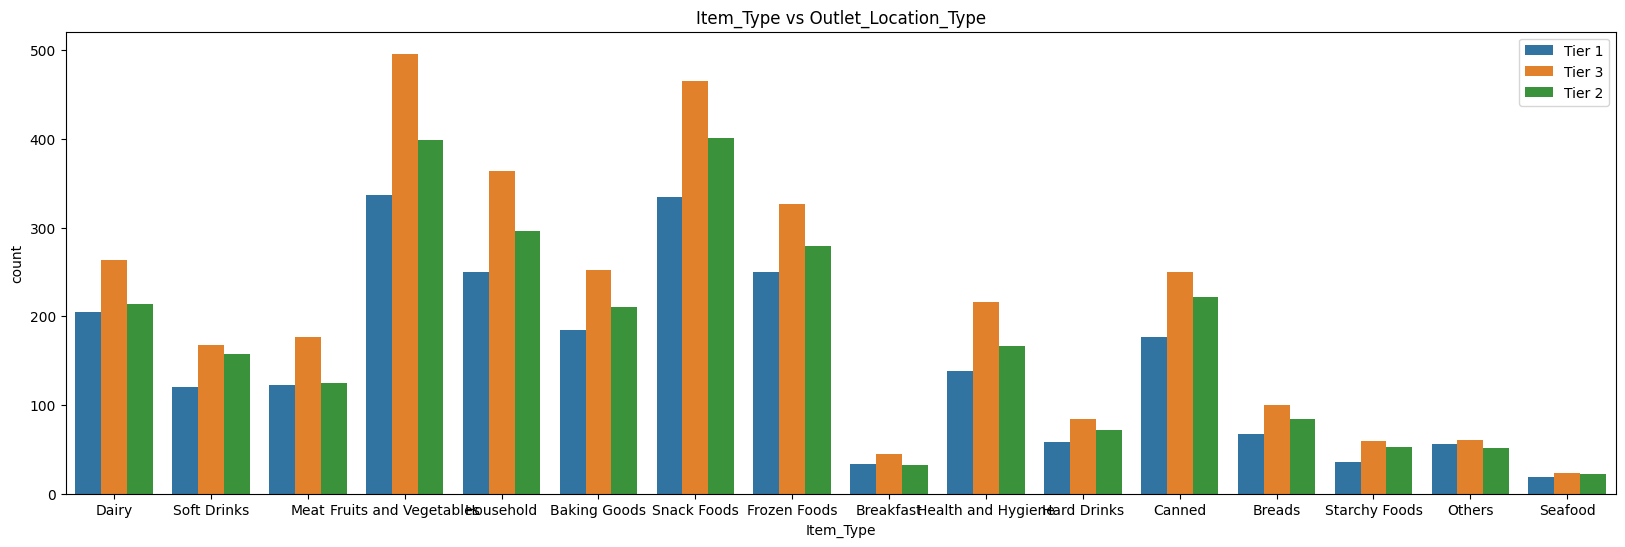

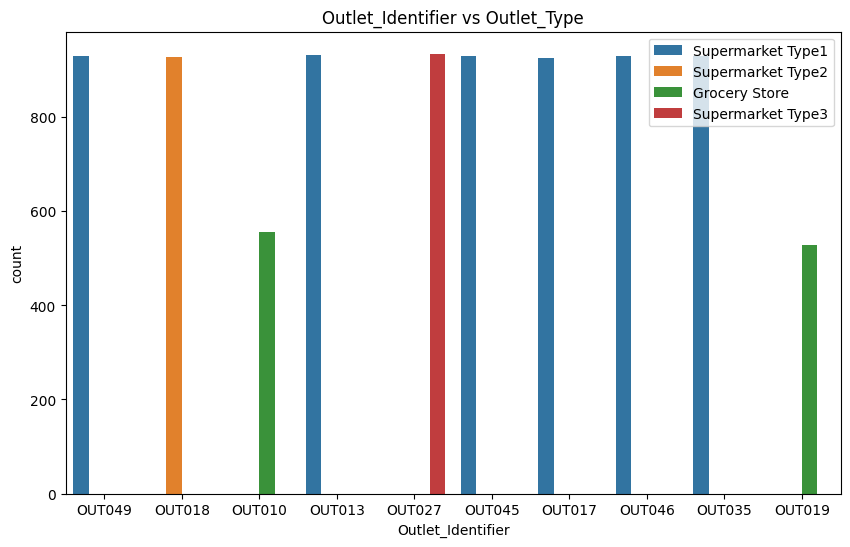

In [25]:
# Bivariate analysis for categorical vs numerical columns using box plots
sns.boxplot(data=train, x='Item_Fat_Content', y='Item_Outlet_Sales')
plt.title("Item_Fat_Content vs Item_Outlet_Sales")
plt.show()

plt.figure(figsize=(20,6))
sns.boxplot(data=train, x='Item_Type', y='Item_Outlet_Sales')
plt.title("Item_Type vs Item_Outlet_Sales")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(data=train, x='Outlet_Identifier', y='Item_Outlet_Sales')
plt.title("Outlet_Identifier vs Item_Outlet_Sales")
plt.show()

sns.boxplot(data=train, x='Outlet_Size', y='Item_Outlet_Sales')
plt.title("Outlet_Size vs Item_Outlet_Sales")
plt.show()

sns.boxplot(data=train, x='Outlet_Location_Type', y='Item_Outlet_Sales')
plt.title("Outlet_Location_Type vs Item_Outlet_Sales")
plt.show()

plt.figure(figsize=(15,6))
sns.boxplot(data=train, x='Outlet_Type', y='Item_Outlet_Sales')
plt.title("Outlet_Type vs Item_Outlet_Sales")
plt.show()

# Bivariate analysis for categorical vs categorical columns using count plots
sns.countplot(data=train, x='Item_Fat_Content', hue='Outlet_Size')
plt.title("Item_Fat_Content vs Outlet_Size")
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(20,6))
sns.countplot(data=train, x='Item_Type', hue='Outlet_Location_Type')
plt.title("Item_Type vs Outlet_Location_Type")
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(data=train, x='Outlet_Identifier', hue='Outlet_Type')
plt.title("Outlet_Identifier vs Outlet_Type")
plt.legend(loc='upper right')
plt.show()

In [26]:
categorical_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### Step 4: Label Encoding

In [27]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le = LabelEncoder()
train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])
train['Item_Type'] = le.fit_transform(train['Item_Type'])
train['Outlet_Identifier'] = le.fit_transform(train['Outlet_Identifier'])
train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])
train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])
train['Outlet_Type'] = le.fit_transform(train['Outlet_Type'])

# train = pd.get_dummies(train, columns=['Item_Fat_Content','Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])


# Create a OneHotEncoder object
ohe = OneHotEncoder()

# Apply one hot encoding to each categorical column
X = ohe.fit_transform(train[categorical_cols]).toarray()


### Step 5: Modeling

In [28]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']


# Split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_train, test_size=0.2, random_state=42)

### Step 6: Preprocessing Data

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_val)

### Step 7: Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Create a LinearRegression object
lr = LinearRegression()

# Fit the model on the training set
lr.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_lr = lr.predict(X_val)

# Evaluate the model using MAE
mae_lr = mean_absolute_error(y_val, y_pred_lr)


### Step 8: Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor object
rf = RandomForestRegressor(n_estimators=10, random_state=0)

# Fit the model on the training set
rf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_rf = rf.predict(X_val)



In [ ]:
y_pred_rf

array([1359.2307 , 1258.16226, 1152.89928, ..., 1165.4829 , 1165.4829 ,
       1279.86734])

In [ ]:
# Evaluate the model using MAE
mae_rf = mean_absolute_error(y_val, y_pred_rf)

In [ ]:
mae_rf 

1328.0866065923753

### This a good value for MAE (Mean Absolute Error)

### Step 9: Calculate The Acurrecy

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred_rf))
print("RMSE:", rmse)


RMSE: 1847.022777263909


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(rf, X_train, y_train, cv = 10)

accuracies.mean()

0.252116701502244

### We got an accuracy of: 25%